In [52]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import sklearn.model_selection
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
dataset_path = 'Admission_Predict_Ver1.1.csv'
raw_dataset = pd.read_csv(dataset_path, sep=",")

dataset = raw_dataset.copy()
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [16]:
dataset = raw_dataset.copy() # Borrar el raw copy, es para poder hacer prints sobre esto y no tener datos distintos

# Split into vectors the dataset. y_all being the chance, x_all the other cols
# Y also gets categorized in 5 classes as output asks for.
bins = pd.cut(dataset.pop("Chance of Admit "), bins=np.arange(0, 1.1, 0.2), labels=[0,1,2,3,4])
y_all = keras.utils.to_categorical(bins, num_classes=5)
x_all = dataset

# Split dataset into train and tests. 33% used as asked.
x_train, x_valid, y_train, y_valid = sklearn.model_selection.train_test_split(x_all, y_all, test_size=0.33, random_state=0)

In [28]:
y_valid

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1.

In [43]:
def build_model():
  model = keras.Sequential([
    layers.BatchNormalization(input_shape=tuple([x_train.shape[1]])),
    layers.Dense(32, activation=tf.nn.relu),
    layers.Dropout(rate=0.5),
    layers.BatchNormalization(),
    layers.Dense(32, activation=tf.nn.relu),
    layers.Dropout(rate=0.5),
    layers.BatchNormalization(),
    layers.Dense(32, activation=tf.nn.relu),
    layers.Dropout(rate=0.5),
    layers.Dense(5, activation=tf.nn.sigmoid)
  ])

  model.compile(loss='categorical_crossentropy',
                optimizer='adadelta',
                metrics=['accuracy'])
  return model

In [44]:
model = build_model()
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_v1 (Batc (None, 8)                 32        
_________________________________________________________________
dense_9 (Dense)              (None, 32)                288       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 32)                128       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
___________________________

In [49]:
history = model.fit(x_train, y_train, batch_size=1024, epochs=200, validation_data=(x_valid, y_valid), verbose=1)

Train on 335 samples, validate on 165 samples
Epoch 1/200
335/335 [==============================] - 0s 20us/sample - loss: 0.6485 - acc: 0.7612 - val_loss: 5.0832 - val_acc: 0.2364
Epoch 2/200
335/335 [==============================] - 0s 25us/sample - loss: 0.6660 - acc: 0.7761 - val_loss: 4.9750 - val_acc: 0.2364
Epoch 3/200
335/335 [==============================] - 0s 32us/sample - loss: 0.6062 - acc: 0.7642 - val_loss: 4.9660 - val_acc: 0.2364
Epoch 4/200
335/335 [==============================] - 0s 31us/sample - loss: 0.6027 - acc: 0.7552 - val_loss: 4.8541 - val_acc: 0.2364
Epoch 5/200
335/335 [==============================] - 0s 40us/sample - loss: 0.7001 - acc: 0.7463 - val_loss: 4.7218 - val_acc: 0.2364
Epoch 6/200
335/335 [==============================] - 0s 30us/sample - loss: 0.5621 - acc: 0.7731 - val_loss: 4.6528 - val_acc: 0.2364
Epoch 7/200
335/335 [==============================] - 0s 71us/sample - loss: 0.5656 - acc: 0.7672 - val_loss: 4.6149 - val_acc: 0.2364
Ep

Epoch 61/200
335/335 [==============================] - 0s 20us/sample - loss: 0.5642 - acc: 0.7851 - val_loss: 2.2602 - val_acc: 0.4364
Epoch 62/200
335/335 [==============================] - 0s 23us/sample - loss: 0.5938 - acc: 0.7701 - val_loss: 2.2179 - val_acc: 0.4364
Epoch 63/200
335/335 [==============================] - 0s 22us/sample - loss: 0.5719 - acc: 0.7612 - val_loss: 2.1681 - val_acc: 0.4364
Epoch 64/200
335/335 [==============================] - 0s 19us/sample - loss: 0.5563 - acc: 0.8239 - val_loss: 2.1624 - val_acc: 0.4364
Epoch 65/200
335/335 [==============================] - 0s 28us/sample - loss: 0.5770 - acc: 0.7672 - val_loss: 2.1333 - val_acc: 0.4424
Epoch 66/200
335/335 [==============================] - 0s 27us/sample - loss: 0.6021 - acc: 0.7463 - val_loss: 2.0770 - val_acc: 0.4606
Epoch 67/200
335/335 [==============================] - 0s 20us/sample - loss: 0.6058 - acc: 0.7731 - val_loss: 2.0370 - val_acc: 0.4606
Epoch 68/200
335/335 [===================

Epoch 121/200
335/335 [==============================] - 0s 29us/sample - loss: 0.5543 - acc: 0.7761 - val_loss: 1.1305 - val_acc: 0.6242
Epoch 122/200
335/335 [==============================] - 0s 21us/sample - loss: 0.5232 - acc: 0.7940 - val_loss: 1.1302 - val_acc: 0.6242
Epoch 123/200
335/335 [==============================] - 0s 22us/sample - loss: 0.5447 - acc: 0.7910 - val_loss: 1.1302 - val_acc: 0.6242
Epoch 124/200
335/335 [==============================] - 0s 24us/sample - loss: 0.5392 - acc: 0.7851 - val_loss: 1.1192 - val_acc: 0.6303
Epoch 125/200
335/335 [==============================] - 0s 28us/sample - loss: 0.5742 - acc: 0.7343 - val_loss: 1.1109 - val_acc: 0.6303
Epoch 126/200
335/335 [==============================] - 0s 32us/sample - loss: 0.5555 - acc: 0.7672 - val_loss: 1.0914 - val_acc: 0.6242
Epoch 127/200
335/335 [==============================] - 0s 40us/sample - loss: 0.5178 - acc: 0.7881 - val_loss: 1.0868 - val_acc: 0.6242
Epoch 128/200
335/335 [===========

Epoch 181/200
335/335 [==============================] - 0s 23us/sample - loss: 0.5517 - acc: 0.7970 - val_loss: 0.8069 - val_acc: 0.7212
Epoch 182/200
335/335 [==============================] - 0s 18us/sample - loss: 0.5001 - acc: 0.7791 - val_loss: 0.8032 - val_acc: 0.7273
Epoch 183/200
335/335 [==============================] - 0s 29us/sample - loss: 0.5548 - acc: 0.7761 - val_loss: 0.8050 - val_acc: 0.7273
Epoch 184/200
335/335 [==============================] - 0s 33us/sample - loss: 0.4738 - acc: 0.8119 - val_loss: 0.8045 - val_acc: 0.7273
Epoch 185/200
335/335 [==============================] - 0s 23us/sample - loss: 0.4925 - acc: 0.7851 - val_loss: 0.7981 - val_acc: 0.7273
Epoch 186/200
335/335 [==============================] - 0s 21us/sample - loss: 0.5476 - acc: 0.7672 - val_loss: 0.7889 - val_acc: 0.7333
Epoch 187/200
335/335 [==============================] - 0s 29us/sample - loss: 0.5088 - acc: 0.8299 - val_loss: 0.7859 - val_acc: 0.7333
Epoch 188/200
335/335 [===========

In [46]:
x_test = dataset
y_test = model.predict(x_test)

y_test

array([[1.19209290e-07, 0.00000000e+00, 0.00000000e+00, 8.94069672e-08,
        1.00000000e+00],
       [8.97049904e-06, 1.01327896e-06, 2.98023224e-08, 1.23083591e-05,
        9.99998450e-01],
       [4.00930643e-04, 1.17957592e-04, 1.99079514e-05, 2.31999159e-03,
        9.99672055e-01],
       ...,
       [1.49011612e-07, 0.00000000e+00, 0.00000000e+00, 8.94069672e-08,
        1.00000000e+00],
       [1.05291605e-04, 2.09510326e-05, 1.66893005e-06, 4.04000282e-04,
        9.99949932e-01],
       [4.97698784e-06, 4.15769136e-07, 8.95580499e-09, 6.45638420e-06,
        9.99999404e-01]], dtype=float32)

In [48]:
# Error cuadratico medio
from sklearn.metrics import mean_squared_error
cm = mean_squared_error(y_all, y_test)
cm

0.28194952

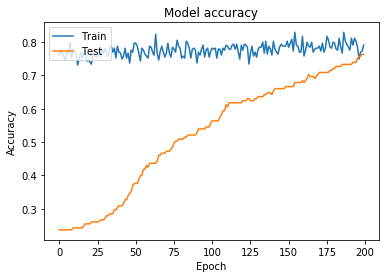

In [53]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

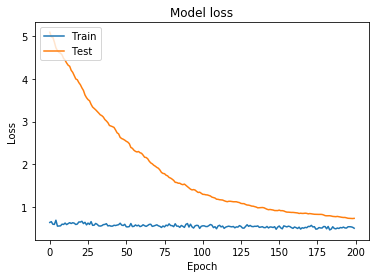

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()